<center>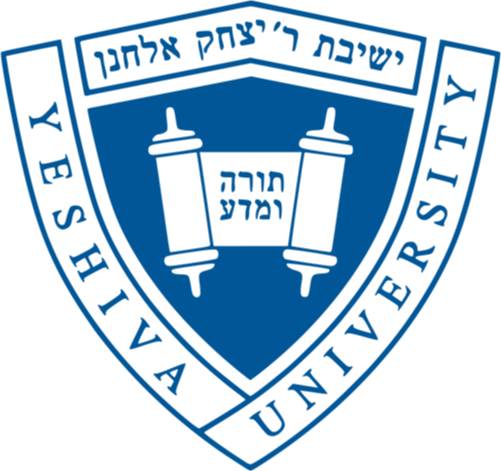</center>

# <center>Katz School of Science and Health<br>AIM 5001 Data Acquisition & Management<p>AIM 5001 M9 Assignment</center>

### <center>Radek Jan Holik</center>
### <center>Sheng-Han Yueh</center>
### <center>Chi-Kuang Chen</center>

# **Part I:**
**(30 points): Working with HTML and JSON**<p>
Pick three of your favorite books on one of your favorite subjects. At least one of the books should have more than one author. For each book, include the title, authors, and two or three other attributes that you find interesting. Take the information that you’ve selected about these three books, and separately create two files, one of which stores the books’ information in HTML (using an html table) and the other of which stores the books’ information in JSON format (e.g. “books.html” and “books.json”). To help you better understand the different file structures, you should create each of these files “by hand” unless you’re already very comfortable with the file formats. Post the two source files to your GitHub repository, and load them you’re your Jupyter Notebook from your online repository. Then, write Python code, using your packages of choice, to load the information from each of the two files you’ve created into separate PANDAS data frames. Are the two data frames identical?<p>
Your deliverable for Part I of this Assignment is the two source files and your Python code. Package your Python code within a Jupyter notebook (along with your code for Parts II and III below).

#### Importing the necessary libraries

In [1]:
import json 
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 120)
import warnings
warnings.filterwarnings("ignore")

#### Loding Data

In [49]:
# The file path to my online AIM 5001 Github Repository with the "books.html" and "books.json" files
filePathHTML = r"https://raw.githubusercontent.com/rjholik/AIM-5001-Data-Acquisition-Management/main/Module%2009/books.html"
filePathJSON = r'https://raw.githubusercontent.com/rjholik/AIM-5001-Data-Acquisition-Management/main/Module%2009/books.json'

In [50]:
# Dataframe from HTML
dfHTML = pd.read_html(filePathHTML)[0]
dfHTML[["Title","Author(s)","Publisher"]] = dfHTML[["Title","Author(s)","Publisher"]].astype("string")
dfHTML.head()

,Title,Author(s),Publisher,Last Publication Date,Pages
0,A Brief History of Time,Stephen Hawking,Bantam,2011-05-04,242
1,"'Surely You're Joking, Mr. Feynman!': Adventur...","Richard P. Feynman, Ralph Leighton, Edward Hut...",W. W. Norton & Compan,2010-06-28,352
2,"The Elegant Universe: Superstrings, Hidden Dim...",Brian Greene,W. W. Norton & Compan,2009-01-08,447


In [51]:
# Dataframe from JSON
dfJSON = pd.read_json(filePathJSON)
dfJSON[["Title","Author(s)","Publisher"]] = dfJSON[["Title","Author(s)","Publisher"]].astype("string")
dfJSON["Author(s)"] = dfJSON["Author(s)"].str.strip('[]')
dfJSON["Author(s)"] = dfJSON["Author(s)"].str.replace("'","")
dfJSON.head()

,Title,Author(s),Publisher,Last Publication Date,Pages
0,A Brief History of Time,Stephen Hawking,Bantam,2011-05-04,242
1,"'Surely You're Joking, Mr. Feynman!': Adventur...","Richard P. Feynman, Ralph Leighton, Edward Hut...",W. W. Norton & Compan,2010-06-28,352
2,"The Elegant Universe: Superstrings, Hidden Dim...",Brian Greene,W. W. Norton & Compan,2009-01-08,447


## <center>The two data frames are identical.</center>

# **Part II:**
**(40 points): Scraping the Katz School’s “Staff” Web Page**<p>
For Part II of this Assignment, you will be using your web scraping skills to extract data from a Katz School web page. Specifically, you will be extracting specific content from the Katz School’s “Staff” information page.<p>
- From within your Python environment, access the web page containing the Katz School’s “Staff” information (https://www.yu.edu/katz/staff ) using whatever Python method you feel is most appropriate.<p>
- Create a BeautifulSoup **class** to parse the page you have downloaded.<p>
- Within the downloaded content of the web page, use your Python skills to locate the **div** with **class=”text-only”**, and assign the results to a variable named **staff**.<p>
- Create a Pandas dataframe named **staff_info** having columns **office, name, title, email, and phone**. Each column should be capable of storing character strings.<p>
- Within the HTML content stored within your **staff** variable, locate and extract each staff member’s name, title, email address (if provided), phone (if provided) and the name of the office to which they are assigned and save these items to your **staff_info** dataframe. Note that if either an email address or phone number is not provided for a staff member, your Python code should place the text string **“N/A”** within the corresponding dataframe column for that staff member. When finished you should have one dataframe row for each staff member listed on the Katz School’s “Staff” web page. Note that it is up to you to determine how to most effectively extract the individual data items for each staff member from the block of HTML data contained within your **staff** variable: You may use whatever HTML extraction and/or string processing methods (e.g., Python’s string manipulation functions; regular expressions, etc.) you believe are most appropriate.

In [52]:
page = requests.get("https://www.yu.edu/katz/staff")
page

<Response [200]>

__<Response [200]> means that the page downloaded successfully__

In [53]:
page.content # show the content of the url

b'\n<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n    <!-- Google Tag Manager -->\n    <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n                new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n            j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n            \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n        })(window,document,\'script\',\'dataLayer\',\'GTM-PSVTTKK\');</script>\n    <!-- End Google Tag Manager -->\n    <!-- Start People Grove Cards -->\n    <script src="https://

__Create a BeautifulSoup class to parse the page.__

In [54]:
soup = BeautifulSoup(page.content, 'html.parser')

In [55]:
print(soup.prettify()) # formatted as html

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-PSVTTKK');
  </script>
  <!-- End Google Tag Manager -->
  <!-- Start People Grove Cards -->
  <script async="" src="https://cdn.peoplegrove.com/pg-widge

__Locate the div with class=”text-only”__

In [56]:
staff=soup.find_all('div',{'class':'text-only'})

__Transfer data type into string and preprocess__ 

In [57]:
string = str(staff).replace(u'\xa0', u' ') # replace \xa0 with a space
string = string.split('<h3>')

In [58]:
string

['[<div class="text-only">\n<div class="field field--name-field-paragraph-body">',
 'Office of the Dean </h3>\n<p>Paul Russo, Vice Provost and Dean <br/>\n<a href="/faculty/pages/russo-paul">Read Dr. Russo\'s full biography</a> </p>\n<p>Aaron Ross, Director of Strategic Initiatives and Deputy to the Dean <br/>\n<a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>\n <br/>\nSofia Binioris, Senior Project Manager and Advisor to the Dean <br/>\n<a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a>  </p>\n<p>Jackie Hamilton, Director of Global Engagement and New Business Development<br/>\n<a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>\n<p>Tabitha Collazo, Business and Operations Coordinator<br/>\n<a href="mailto:tabitha.collazo@yu.edu">tabitha.collazo@yu.edu</a> | 646-592-4735</p>\n',
 'Graduate Admissions</h3>\n<p>Jared Hakimi, Director<br/>\n<a href="mailto:jared.hakimi@yu.edu">jared.hakimi@yu.edu</a> | 646-592-

__Create a dataframe to hold the information extracted from the URL__

In [59]:
staff_info = pd.DataFrame(columns=['office', 'name', 'title','email','phone'])

__Extract information and store it into a list by using Regular expression__

In [60]:
leng_start=0 # to count the number of staff in each office
office=[]
name=[]
title=[]
email=[]
phone=[]
for i in string:
    if '</h3>' in i:
        data=i.split('</h3>\n') # split string according to the office
        #print(data[1])
        off_res=data[0] # the name of office
        #print(off_res)
        for para in data[1].split('<p>'): # split string according on each staff
            #print(para)
            #print('---------')
            if para != '':
                if len(para.split('<br/'))<=3: #remove the case that has multiple staff in the same paragraph
                    #print(para)
                    #print('---------')
                    name_res=para.split(',')[0]
                    name.append(name_res)
                    title_res=para.split(',')[1].split('<br/>')[0]
                    title.append(title_res)
                
                    e_res=re.search('([\da-z.\-]+@yu.edu)</a>',para)
                    if e_res:
                        email.append(e_res.group(1))
                    else:
                        email.append('N/A')
                    
                    p_res=re.search('(\d{3}\-\d{3}\-\d{3})',para)
                    if p_res:
                        phone.append(p_res.group(1))
                    else:
                        phone.append('N/A')                    
                else:                      # process the case has two staff in the same paragraph
                    #print(para)
                    name+=re.findall('[\n]*([\w\s\-]+), ',para)
                    
                    for staff in para.split('Sofia Binioris'): # use the name to separate two staff
                        #print(staff)
                        title_res=staff.split(',')[1].split('<br/>')[0]
                        title.append(title_res)
                        
                        e_res=re.search('([\da-z.\-]+@yu.edu)</a>',staff)
                        if e_res:
                            email.append(e_res.group(1))
                        else:
                            email.append('N/A')
                    
                        p_res=re.search('(\d{3}\-\d{3}\-\d{3})',staff)
                        if p_res:
                            phone.append(p_res.group(1))
                        else:
                            phone.append('N/A')
                    
        leng_stop=len(name)
        #print(leng_stop-leng_start) count the number of staff in each office
        office+=[off_res]*(leng_stop-leng_start)
        #print([off_res])
        leng_start=leng_stop

__Store the above lists into staff_info dataframe__

In [61]:
staff_info['office'] = office
staff_info['name'] = name
staff_info['title'] = title
staff_info['email'] = email
staff_info['phone'] = phone

__Show the result__

In [62]:
staff_info

,office,name,title,email,phone
0,Office of the Dean,Paul Russo,Vice Provost and Dean,N/A,N/A
1,Office of the Dean,Aaron Ross,Director of Strategic Initiatives and Deputy ...,aaron.ross2@yu.edu,646-592-414
2,Office of the Dean,Sofia Binioris,Senior Project Manager and Advisor to the Dean,sofia.binioris@yu.edu,N/A
3,Office of the Dean,Jackie Hamilton,Director of Global Engagement and New Busines...,jackie.hamilton@yu.edu,646-787-619
4,Office of the Dean,Tabitha Collazo,Business and Operations Coordinator,tabitha.collazo@yu.edu,646-592-473
5,Graduate Admissions,Jared Hakimi,Director,jared.hakimi@yu.edu,646-592-472
6,Graduate Admissions,Shayna Matzner,Assistant Director,shayna.matzner@yu.edu,646-592-472
7,Graduate Admissions,Xavier Velasquez,Assistant Director,xavier.velasquez@yu.edu,646-592-473
8,Graduate Student Life,Rafael Reyes,Director of Graduate Student Life and Communi...,rafael.reyes@yu.edu,646-592-472
9,Academic Programs,Shari Lowsky,Academic Program Manager,shari.lowsky@yu.edu,646-592-431


# **Part III:**
**(30 points): Working with Web API’s**<p>

<center>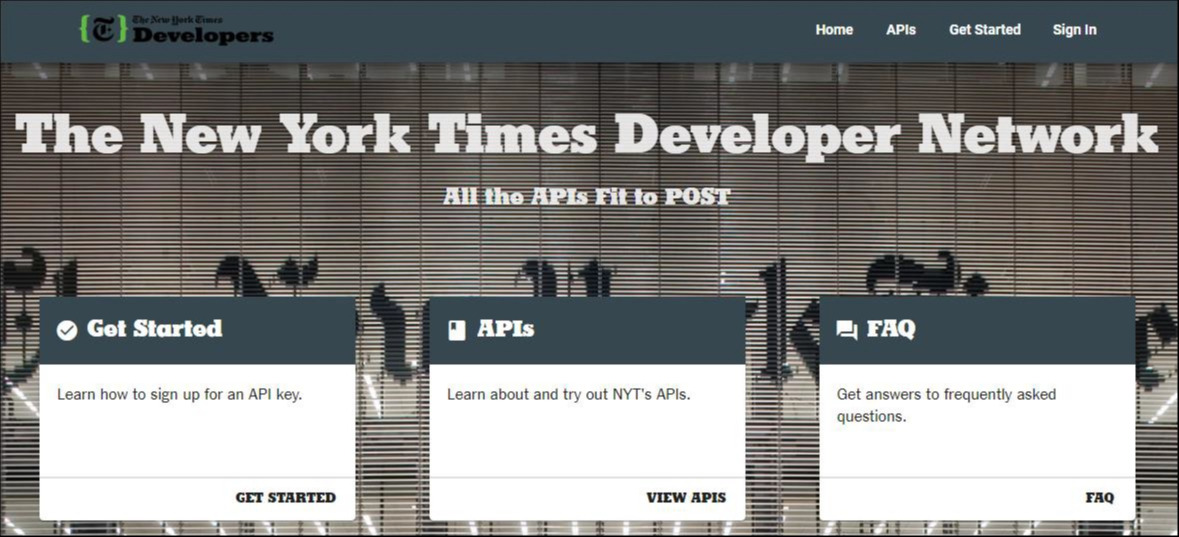</center>

The New York Times web site provides a rich set of APIs, as described here: https://developer.nytimes.com
<p>
You’ll need to start by signing up for an API key.
<p>
Your task is to then choose one of the New York Times APIs and construct an interface in Python to read JSON data accessible via the API and transform that data into a Pandas data frame that is suitable for use in data analysis work. Once you’ve captured the data you are interested in, do some basic analysis of your choosing using the content of your dataframe and provide a written narrative within formatted Markdown cells explaining the results of your analysis.
<p>
<b>Your Jupyter Notebook deliverable should be similar to that of a publication-quality / professional caliber document and should include clearly labeled graphics, high-quality formatting, clearly defined section and sub-section headers, and be free of spelling and grammar errors. Furthermore, your Pythion code should include succinct explanatory comments.<b>

## (a) Introduction: The New York Times Top Stories API
The New York Times Top Stories API returns an array of articles currently on the specified section for arts, business and more. This includes services to access data for; arts, automobiles, books, business, fashion, food and more. The Times Developer Network is an API clearinghouse and community to get the latest news about New York Times APIs, read the API documentation, and browse the application gallery.

## (b) Data Summary

The dataset came from the The New York Times Developer Network. The original dataset contains 37 rows and 19 attributes. Top Stories: The Top Stories API returns an array of articles currently on the specified section (arts, business, ...). These attributes are:

section:string, nominal and categorical with values

subsection:string, nominal and categorical with values

title:string

abstract:string

url:string

uri:string

byline:string

item_type:string

updated_date:string

created_date:string

published_date:string

material_type_facet:string

kicker:string

des_facet:array	

org_facet:array	

per_facet:array	

geo_facet:array	

multimedia:array	

In [ ]:
# Make a request to a web page, and return the status code:

from pprint import pprint

res=requests.get('https://api.nytimes.com/svc/topstories/v2/world.json?api-key=J0H4oBvIW8hbOk8ceewp6mAtXGVNrAju')
print(res.json())

In [ ]:
# https://stackoverflow.com/questions/64669649/is-there-a-way-to-print-out-certain-elements-of-the-json-file-in-python
# Using jprint function to see the format of JSON

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(res.json())

In [ ]:
# convert JSON to Pandas DataFrame by simply using read_json(). Just pass JSON string to the function. 
# It takes multiple parameters, for our case I am using orient that specifies the format of JSON string. 
# This function is also used to read JSON files into pandas DataFrame.
# Results are under the second layer of JSON Code

x = res.json()
df = pd.read_json(json.dumps(x))
df2 = pd.DataFrame.from_records(df['results'])

df2

In [ ]:
# Read the third layer of JSON Code for geo_facet under df2

df_geo_facet = pd.DataFrame.from_records(df2['geo_facet'])
df_geo_facet

In [ ]:
df2.columns[df2.isnull().any()]

In [ ]:
df2.info()

#### Checked for nulls and missing values. Based on the results above, the dataset does not contain any nulls or missing values. At this point, the number of use cases for the analysis and for all attributes is still the same at 38.

In [ ]:
df2.describe()

#### There is a data set that is used for the daily top stories from The New York Times, which is part of this data set. Because of this, there are no numerical attributes in this data set as a result of this fact. In spite of this, it is possible to analyze the data set using the categorical attributes.

There is a tendency to find that the most common section of the Top Stories is the "World" section.

In terms of subsections, the most common one is "Europe".

We cannot find any shared or identifiable information across all data points for title/abstract/url/uil/byline/updated_date/created_date/published_date, since many of them are unique strings, which make it hard for us to identify them.

## (c) Exploratory Data Analysis (EDA) & Data Initialization:

In [ ]:
# In the analysis, how many sections fall into each category and how many percent fall into each category

print(df2['section'].value_counts())  #prints count for each section category
print(df2['section'].value_counts()/len(df2)) #prints proportion of each section category

In [ ]:
# side-by-side barplot Matplotlib and Seaborn for sectopm attribute
# define a new figure for plotting
plt.figure(figsize=(10,5))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# matplotlib graph of Section
#df2['section'].value_counts().plot.bar()
section_count = df2.groupby('section').count()['subsection']
section_count.plot.bar();

# give the plot a title
plt.title('Section Bar Chart (Matplotlib)')
plt.xlabel('Section')
plt.ylabel('Count')

# define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# Seaborn graph of Section
sns.countplot(x='section',data=df2)

# give the plot a title
plt.title('Section Bar Chart (Seaborn)')
plt.xlabel('Section')
plt.ylabel('Count')
plt.show()

#### **Discussion of Results:**

World shows the most frequent category for section attributes. Approximately 60% of the total number of sections are in this category.

In [2]:
# In the analysis, how many Item Type fall into each category and how many percent fall into each category

print(df2['item_type'].value_counts())  #prints count for each item type category
print(df2['item_type'].value_counts()/len(df2)) #prints proportion of each item type category

NameError: name 'df2' is not defined

In [ ]:
# side-by-side barplot Matplotlib and Seaborn for sectopm attribute
# define a new figure for plotting
plt.figure(figsize=(10,5))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# matplotlib graph of Sex
#df2['section'].value_counts().plot.bar()
item_type_count = df2.groupby('item_type').count()['subsection']
item_type_count.plot.bar();

# give the plot a title
plt.title('item_type Bar Chart (Matplotlib)')
plt.xlabel('item_type')
plt.ylabel('Count')

# define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

# Seaborn graph of Sex
sns.countplot(x='item_type',data=df2)

# give the plot a title
plt.title('item_type Bar Chart (Seaborn)')
plt.xlabel('item_type')
plt.ylabel('Count')
plt.show()


#### **Discussion of Results:**

Acticle shows the most frequent category for item_type attributes. Approximately 90% of the total number of sections are in this category.
The other two types of the items are interactive (8%) and promo (2%)

In [ ]:
# This analysis attempts to determine the extent of organication of top stories
# 18 of 38 the top news do not report the involved party, around 47%.
# There are multiple "org_facet" more than one involved party.

print(df2['org_facet'].value_counts())  #prints count for each org_facet category
print(df2['org_facet'].value_counts()/len(df2)) #prints proportion of each org_facet category

In [ ]:
# Using dataframe to breadown additional layer of JSON structure for org_facet

df_org_facet = pd.DataFrame.from_records(df2['org_facet'])
df_org_facet

# store the results in dataframe

a = df_org_facet[0].value_counts()

b = df_org_facet[1].value_counts()

c = df_org_facet[2].value_counts()

d = df_org_facet[3].value_counts()

df=pd.concat([a,b,c,d],axis=1)
df.fillna(0, axis=1, inplace=True)
df.rename({0: "Party1", 1: "Party2", 2: "Party3", 3: "Party4"}, axis=1, inplace=True)

# report each involved parties its frequency in the top stories

df['Total_Show_Fred'] = df['Party1']+df['Party2']+df['Party3']+df['Party4']
Sum_Total_Freq = sum(df['Total_Show_Fred'])
df['Total_Show_Freq_%'] = df['Total_Show_Fred']/Sum_Total_Freq

df

#### **Discussion of Results:**

We can found that around 48% of the top stories do not report the involved parties. On the other hand, we can find that there are multiple organization shows more than once on today's top stoires, i.e. International Energy Agency, European Union, Communist Party of China, and Republican Party.

## (d) Conclusion

#### The New York Times Top Stories API provides the high quality data set source for daily top stories, including 19 attributes. 

1. In spite of the fact that the majority of the data we have is non-numerical, it may still be possible to identify some basic patterns, for example the frequency of certain parties appearing within the org_facet attribute.

2. It is also worth mentioning that there are some contents which do not report the majority of attributes, such as promotion and advertising. It is common for this type of item to have a blank title or subtitle.

3. It is statistically speaking that the majority of the topics that concern geography are aimed at the global market. It is estimated that around 60% of the news is international news, and 40% is news related to the US.